## 딥러닝
- 18일 평가과제 : 텍스트 데이터 분석
- 이미지
- 자연어 처리
- 영상인식
- 추천 알고리즘
- 음성인식
- etc

## 딥러닝 공부
- 교재는 가급적 구매 X
  + 구매한다면 "핸즈온 머신러닝" 2판은 너무 늦었으니 3판이 나온다면 구매
- 홈페이지 이용 : https://www.tensorflow.org/tutorials?hl=ko


In [1]:
# 데이터 수집
# 패션 MNIST
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)
# 이미지 갯수, 행/렬 사이즈

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


### 이미지 출력

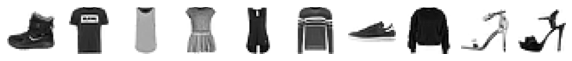

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 10, figsize=(10,10))

for i in range(10):
  ax[i].imshow(train_input[i], cmap = 'gray_r')
  ax[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 주어진 데이터의 라벨 (종속변수)에 따른 각 이미지의 갯수를 확인

In [6]:
import numpy as np
print(np.unique(train_target, return_counts = True))
# 각 라벨당 6천개 / 실제로는 균일하지 않음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 머신러닝에 대한 오해
- 전통적인 머신러닝 알고리즘은 이미지 / 자연어 / 추천 동작하지 않는다?
  + 정확도 및 속도가 느려서 잘 사용하지 않음
- 딥러닝 만능설, 딥러닝 알고리즘은 모든 데이터에서 다 월등한 우위를 점한다?
  + 최신 알고리즘이 옛날에 나왔던 알고리즘보다 모든 방면에서 앞서지 않는다.
- 관점 : 머신러닝 / 딥러닝 알고리즘(도구)를 사용해서 다양하게 실험을 해본다.

## 이미지 데이터 살짝 가공
- 스케일링 한다.

In [7]:
train_scaled = train_input / 255.0 
# 픽셀사이즈 맞춰주기
# RGB 255
train_scaled = train_scaled.reshape(-1, 28 * 28)
# 2차원을 1차원으로 변환
train_scaled.shape

(60000, 784)

In [8]:
# 전통적인 알고리즘도 가능하다는걸 보여줌
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 텐서플로 프레임워크 모델만들기

In [9]:
# 훈련데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [10]:
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784, ))
# output layer : 10, 동작 방식(활성화함수)-마지막에 사용, input layer : 784
model = keras.Sequential(dense)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# loss : 의미없는 데이터들을 연산에서 제외하여 속도를 보다 빠르게 함.
# sparse : 희소행렬(0값이 많이 들어있는 행렬?)
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6118 - accuracy: 0.7925
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4802 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4564 - accuracy: 0.8486
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4453 - accuracy: 0.8511
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.8544


In [11]:
model.evaluate(val_scaled, val_target)
# 정확도
# 인공신경망 초기모델 구현(1949)

375/375 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.8503


[0.44571202993392944, 0.8503333330154419]

- 캐글 노트북, 구글 코랩 GPU 연산
  + 런타임 - 런타임 유형변경 - GPU 설정

In [5]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [14]:
train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape

((48000, 784), (12000, 784), (48000,), (12000,))

## 딥러닝 모형 만들기
- 층(layer)를 구성한다.

In [18]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

# 심층신경망
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 다른 방법
  + layer 네이밍

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = 'Fashion_MNIST_Model') # 띄워쓰기시 오류 발생
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5631 - accuracy: 0.8086
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4073 - accuracy: 0.8521
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8635
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3518 - accuracy: 0.8734
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3343 - accuracy: 0.8782


- 1949년도 모델을 1970년대 모델로 업그레이드
  + 히든 레이어 추가
  + 효과 : 정확도 향상

## 시그모이드(sigmoid) 함수 : 활성화 함수(왜곡되지 않게 데이터를 보존하기 위해 사용)
- 시그모이드 (로지스틱 회귀분석와 유사 / S자 곡선)
- 가장 대표적으로, 일반적으로 자주사용하는 활성화 함수 : ReLu 함수
  + Relu(음수는 0, 양수는 그대로 사용)
- 어느 함수가 좋다 우열가리기 보다는 여러가지 함수를 사용하여 실험한다는 느낌

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(784,), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = 'Fashion_MNIST_Model') # 띄워쓰기시 오류 발생
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5370 - accuracy: 0.8124
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3948 - accuracy: 0.8577
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3574 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8802
Epoch 5/5
1500/1500 [==============

In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3587 - accuracy: 0.8802


[0.35873866081237793, 0.8802499771118164]

## 딥러닝 모형 과적합 확인

In [7]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

- 모델 만들기

In [8]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax'))
  return model  

In [9]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# history = model.fit(train_scaled, train_target, epochs = 5)
history = model.fit(train_scaled, train_target, epochs = 5, verbose=0)
# verbose : 러닝 로그 on/off

In [46]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'accuracy'])
{'loss': [0.5292154550552368, 0.3909091651439667, 0.3553372919559479, 0.3350982666015625, 0.3206453323364258], 'accuracy': [0.8122291564941406, 0.8577291369438171, 0.871666669845581, 0.879687488079071, 0.8863124847412109]}


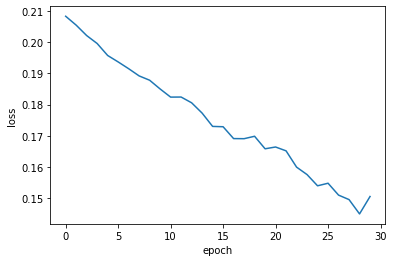

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

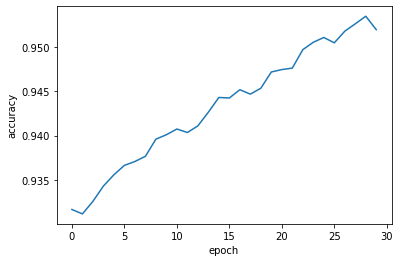

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
plt.show()

- 검증데이터

In [ ]:
history = model.fit(train_scaled, train_target, epochs = 30, verbose=1,validation_data = (val_scaled, val_target))

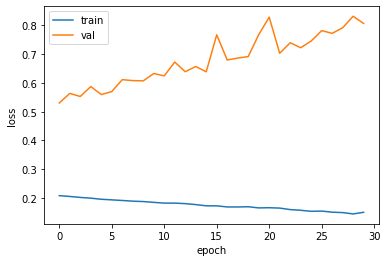

In [55]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])
plt.show()

- train과 val이 유사한 곡선을 그리면 잘 만든 모델
- train과 val의 차이가 벌어지면 과적합(=과대적합, Overfitting)

## 옵티마이저
- 모형 가속기
- 일반적인 모델에서 최적 아닌 최적를 찾을 시 빠져나감
- 일정 지점들을 만들어서 최적를 찾는 방식
- 잘 모를시 adam 사용

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3029 - accuracy: 0.8896 - val_loss: 0.3511 - val_accuracy: 0.8779
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2837 - accuracy: 0.8966 - val_loss: 0.3698 - val_accuracy: 0.8670
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2720 - accuracy: 0.8986 - val_loss: 0.3406 - val_accuracy: 0.8843
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2585 - accuracy: 0.9053 - val_loss: 0.3330 - val_accuracy: 0.8832
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2506 - accuracy: 0.9063 - val_loss: 0.3266 - val_accuracy: 0.8832
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2415 - accuracy: 0.9100 - val_loss: 0.3439 - val_accuracy: 0.8812
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2312 - accuracy: 0.9141 - val_loss: 0.3332 - val_accuracy:

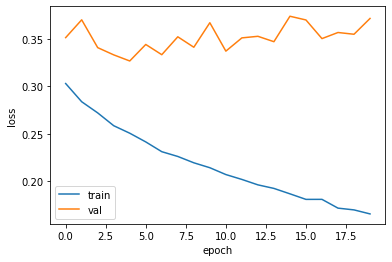

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose=1,validation_data = (val_scaled, val_target))

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])
plt.show()

## 드롭아웃
- 중요함.
- 현재 문제점 : 과적합이 계속 일어남
  + 해소하는데 가장 확실한 방법 : 드롭아웃
- 과적합을 해소해줌
- 모형 학습 시간 단축
- 필요없는 레이어의 노드를 정해진 비율로 제거

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 
# train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax'))
  return model  

In [2]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


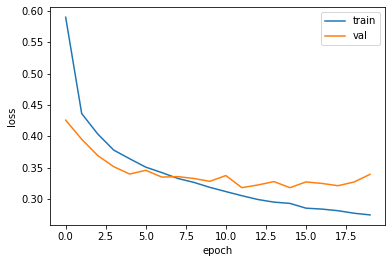

In [3]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

history = model.fit(train_scaled, train_target, epochs = 20, verbose=0,validation_data = (val_scaled, val_target))

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])
plt.show()

## 머신러닝/딥러닝 모형을 만들 때 연구자가 가장 신경써야하는 포인트 : 과적합 방지


## 모델 저장
- 모델 저장

In [9]:
model.save_weights('model-weights.h5')

In [10]:
model.save('model-whole.h5')

## 모델 불러오기

In [11]:
model2 = keras.models.load_model('model-whole.h5')
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8768


[0.3327001631259918, 0.8768333196640015]

In [12]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8768


[0.3327001631259918, 0.8768333196640015]

## Early Stopping
- 모형 학습 속도가 줄어듬
  + 예) epoch 1000번, 100번째 정확도가 99%. 남은 900번을 계속 해야하는가?